<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [57]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **Task 1: Become familiar with the dataset**

In [58]:
boston_df.head()
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [59]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [60]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

## **Task 2: Generate Descriptive Statistics and Visualizations**

##### - For the "Median value of owner-occupied homes" provide a boxplot



Text(0.5, 1.0, 'Median Value of Owner Occupied Homes Box Plot')

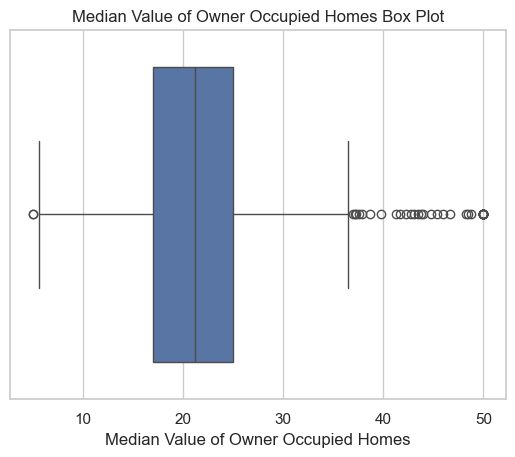

In [61]:
sns.set_theme(style="whitegrid")

medvBox = sns.boxplot(x='MEDV',data=boston_df)

medvBox.set_xlabel('Median Value of Owner Occupied Homes')
medvBox.set_title('Median Value of Owner Occupied Homes Box Plot')

##### - Provide a  bar plot for the Charles river variable



Text(0.5, 1.0, 'Charles River')

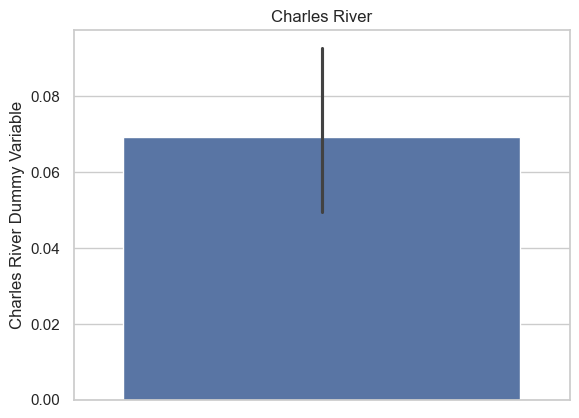

In [62]:
chasBar = sns.barplot(y='CHAS',data=boston_df)

chasBar.set_ylabel("Charles River Dummy Variable")
chasBar.set_title('Charles River')

##### - Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes by Age Group')

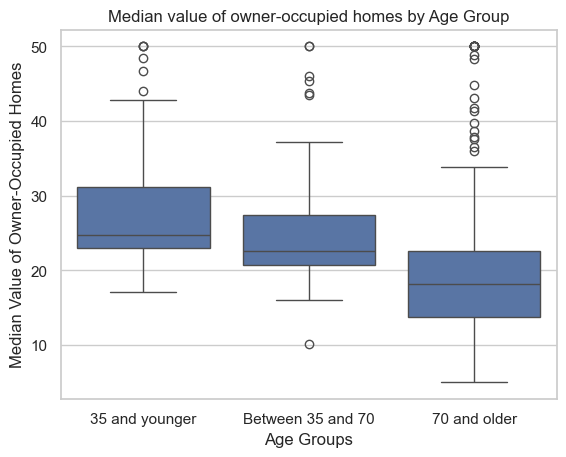

In [63]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[-1, 35, 70, 100], labels=['35 and younger', 'Between 35 and 70', '70 and older'])

ageMedvBox = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

ageMedvBox.set_xlabel("Age Groups")
ageMedvBox.set_ylabel("Median Value of Owner-Occupied Homes")
ageMedvBox.set_title('Median value of owner-occupied homes by Age Group')

##### - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitrous Oxide Concentrations vs Non-Retail Business Acres per Town')

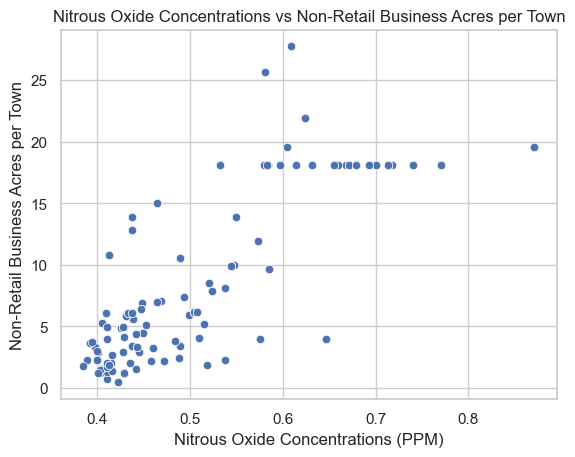

In [64]:
scat = sns.scatterplot(data=boston_df,x='NOX',y='INDUS')

scat.set_xlabel("Nitrous Oxide Concentrations (PPM)")
scat.set_ylabel("Non-Retail Business Acres per Town")
scat.set_title('Nitrous Oxide Concentrations vs Non-Retail Business Acres per Town')

The nitrous oxide concentrations seem to be less concentrated in the towns with less non-retail business acres in them.

##### - Create a histogram for the pupil to teacher ratio variable



Text(0, 0.5, 'Frequency')

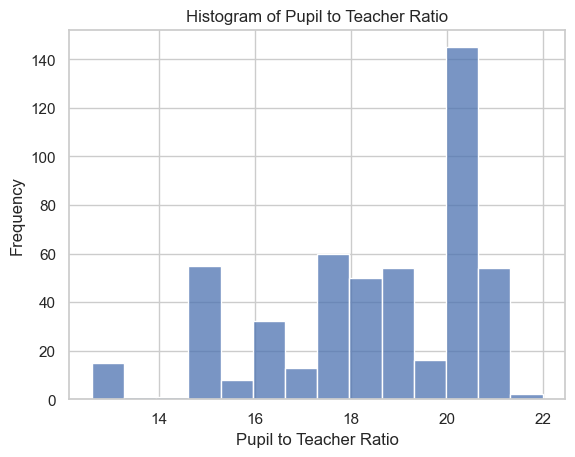

In [65]:
ratio = sns.histplot(data=boston_df, x='PTRATIO')

ratio.set_title('Histogram of Pupil to Teacher Ratio')
ratio.set_xlabel('Pupil to Teacher Ratio')
ratio.set_ylabel('Frequency')

## **Task 3: Use the appropriate tests to answer the questions provided**

##### - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("There is no significant difference in median value of houses bounded by the Charles River")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a significant difference in median value of houses bounded by the Charles River")


Text(0.5, 1.0, 'Distribution of MEDV')

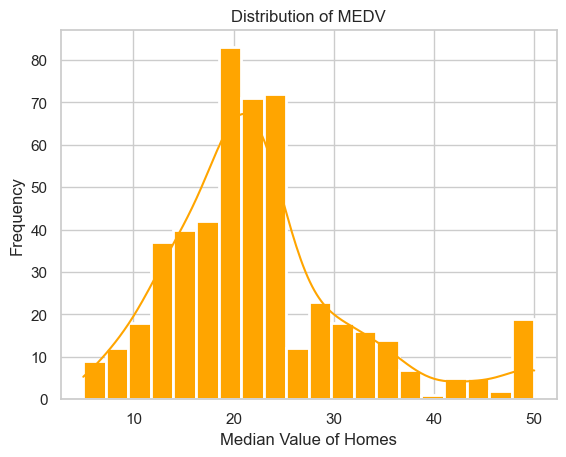

In [66]:
ax1 = sns.histplot(boston_df['MEDV'],
                   bins=20,
                   kde=True,
                   color='orange',
                   linewidth=2,
                   alpha=1)

ax1.set(xlabel='Median Value of Homes', ylabel='Frequency')
ax1.set_title('Distribution of MEDV')

In [67]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [68]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                    boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the P-Value is more than the alpha value of 0.05, we reject the null hypothesis as there are statistics to show that there is a statistical difference between the median values of houses on the Charles River and houses not on the charles river.

##### - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [69]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 36 and 69 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ 
*   $H\_1:$ At least one of the means differ


In [70]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 36 and 69 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [71]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_sixtynine = boston_df[boston_df['age_group'] == 'between 36 and 69 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [72]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_sixtynine, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

##### - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ Nitric Oxide is not correlated with proportion of non-retail business acres per town.
*   $H\_1:$ Nitric Oxide is correlated with proportion of non-retail business acres per town.

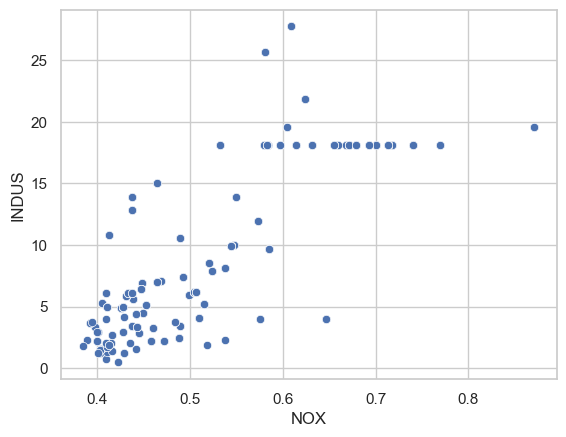

In [75]:
ax2 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [76]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

#### - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

* $H_0: β1$ = 0 (Additional weighted distance to the five Boston employment centers has no effect on median value of owner occupied homes)
* $H_1: β1$ is not equal to 0 (Additional weighted distance to the five Boston employment centers affects the median value of owner occupied homes)

DIS MEDV

In [79]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        00:45:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p-value is less than 0.05 so we reject the null hypothesis as there is evidence that there is a difference in mean median owner-occupied home values based on distance to the five Boston employment centers. Since the DIS coefficient is 1.0916, for each additional unit of distance to employment centers, MEDV increases by about $1,092

# Author

##### Andres Lopez